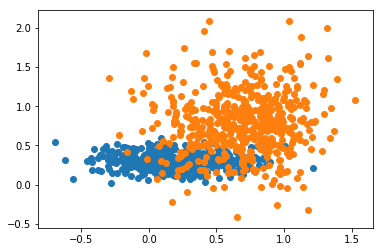

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n, 
                  mean1=(0.2,0.3), mean2=(0.7,0.8), 
                  sd1=(0.3,0.1), sd2=(0.3,0.4)):
    x1 = np.random.normal(mean1[0],sd1[0], n/2)
    x2 = np.random.normal(mean1[1],sd1[1], n/2)
    temp = np.vstack([x1,x2])
    x1 = np.random.normal(mean2[0],sd2[0], n-n/2)
    x2 = np.random.normal(mean2[1],sd2[1], n-n/2)
    X = np.hstack([temp, np.vstack([x1,x2])])
    y = np.array([0]*(n/2)+[1]*(n-n/2))
    data = np.vstack([X,y])
    data = data.T
    np.random.shuffle(data)
    data = data.T
    X, y = data[:2,:], data[2,:]
    return X.T, y.astype(int)
    
X, y = generate_data(1000)
c1 = X[y==0,:]
c2 = X[y==1,:]
plt.scatter(c1[:,0], c1[:,1])
plt.scatter(c2[:,0], c2[:,1])
plt.show()

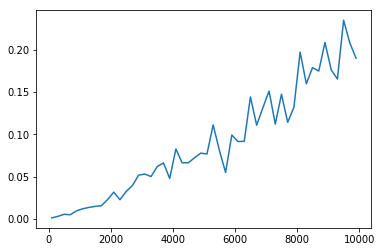

In [35]:
from sklearn.svm import LinearSVC
from time import time
l1 = range(100,10000,200)
l2 = []
ntrials=10
for i in l1:
    meantime = 0
    for j in range(ntrials):
        X, y = generate_data(i)
        model = LinearSVC()
        stime = time()
        model.fit(X,y)
        meantime += time()-stime
    l2.append(meantime/ntrials)
plt.plot(l1,l2)